In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch

In [2]:
os.chdir("..")
print(os.getcwd())

C:\Work\ASTAR\autoBearing


In [3]:
from data_scripts.IMS import IMS

In [4]:
# Download the raw IMS files if it is not found
class arguments():
    def __init__(self):
        self.raw_dir = 'raw_data'
        self.processed_dir = 'processed_data'
        self.window_size = 1024
        self.stride = 0.2
        
args = arguments()
IMS_class = IMS(args)
IMS_class.download_data()

# Data Analysis

In [5]:
# Reading the first snapshot of 1st_test
signal_csv = pd.read_csv(os.path.join(IMS_class.download_path, '1st_test', '2003.10.22.12.06.24'), sep='\t', header=None)
signal_csv

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...
20475,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


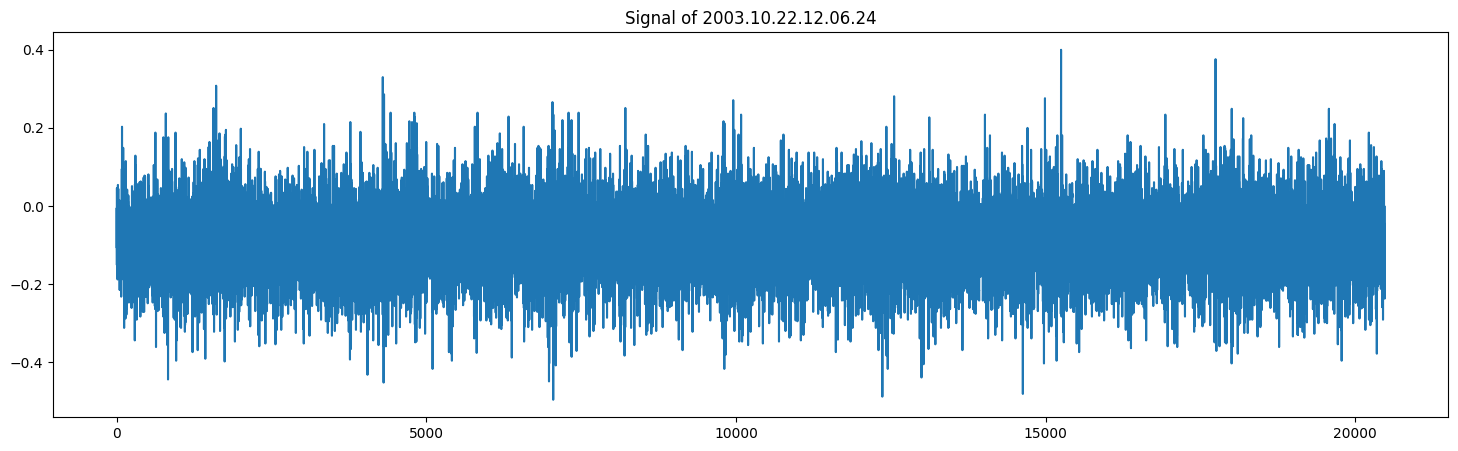

RMS of snapshot 0.12888705027471


In [6]:
bearing1_3 = np.array(signal_csv[4])

plt.figure(figsize=(18,5))
plt.title(f'Signal of 2003.10.22.12.06.24')
plt.plot(bearing1_3)

plt.show()

print(f'RMS of snapshot {np.sqrt(np.mean(bearing1_3 ** 2))}')

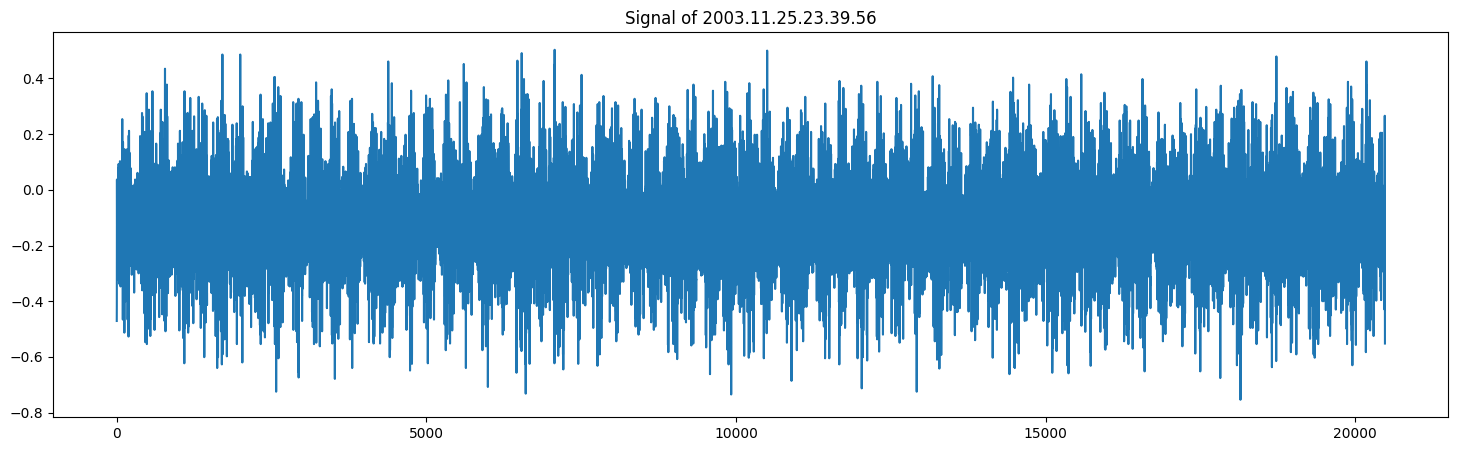

RMS of snapshot 0.2015970267182545


In [7]:
signal_csv = pd.read_csv(os.path.join(IMS_class.download_path, '1st_test', '2003.11.25.23.39.56'), sep='\t', header=None)

bearing1_3 = np.array(signal_csv[3])

plt.figure(figsize=(18,5))
plt.title(f'Signal of 2003.11.25.23.39.56')
plt.plot(bearing1_3)

plt.show()

print(f'RMS of snapshot {np.sqrt(np.mean(bearing1_3 ** 2))}')

In [8]:
# Print all snapshot for the first test
os.listdir(os.path.join(IMS_class.download_path, '1st_test'))

['2003.10.22.12.06.24',
 '2003.10.22.12.09.13',
 '2003.10.22.12.14.13',
 '2003.10.22.12.19.13',
 '2003.10.22.12.24.13',
 '2003.10.22.12.29.13',
 '2003.10.22.12.34.13',
 '2003.10.22.12.39.13',
 '2003.10.22.12.44.13',
 '2003.10.22.12.49.13',
 '2003.10.22.12.54.13',
 '2003.10.22.12.59.13',
 '2003.10.22.13.04.13',
 '2003.10.22.13.09.13',
 '2003.10.22.13.14.13',
 '2003.10.22.13.19.13',
 '2003.10.22.13.24.13',
 '2003.10.22.13.29.13',
 '2003.10.22.13.34.13',
 '2003.10.22.13.39.13',
 '2003.10.22.13.44.13',
 '2003.10.22.13.49.13',
 '2003.10.22.13.54.13',
 '2003.10.22.13.59.13',
 '2003.10.22.14.04.13',
 '2003.10.22.14.09.13',
 '2003.10.22.14.14.13',
 '2003.10.22.14.19.13',
 '2003.10.22.14.24.13',
 '2003.10.22.14.29.13',
 '2003.10.22.14.34.13',
 '2003.10.22.14.39.13',
 '2003.10.22.14.44.13',
 '2003.10.22.14.49.13',
 '2003.10.22.14.54.13',
 '2003.10.22.14.59.13',
 '2003.10.22.15.04.13',
 '2003.10.22.15.09.13',
 '2003.10.22.15.14.13',
 '2003.10.22.15.19.13',
 '2003.10.22.15.24.13',
 '2003.10.22.15.

In [9]:
# Checks if the list is already sorted chronologically
temp_list = []
for snapshot in os.listdir(os.path.join(IMS_class.download_path, '1st_test')):
    # Removes . in the string and convert it to integer. So '2003.10.22.12.06.24' turns into 20031022120624
    temp_list.append(int(snapshot.replace('.', '')))

if(temp_list == sorted(temp_list)):
    print('File is sorted chronologically, proceed with analysis')
else:
    raise NotImplemented('File list is not sorted, implement a function to sort the list chronologically')

File is sorted chronologically, proceed with analysis


In [10]:
def read_1st_test():
    # Read all snapshot in the folder & split them into bearing 1, 2, 3, 4
    snap_shot_list = os.listdir(os.path.join(IMS_class.download_path, '1st_test'))
    bearing1_1_list, bearing1_2_list, bearing1_3_list, bearing1_4_list = [], [], [], []
    for i, snap_shot in enumerate(snap_shot_list):
        bearing1_1_snapshot, bearing1_2_snapshot, bearing1_3_snapshot, bearing1_4_snapshot = read_file(snap_shot)
        bearing1_1_list.append(bearing1_1_snapshot)
        bearing1_2_list.append(bearing1_2_snapshot)
        bearing1_3_list.append(bearing1_3_snapshot)
        bearing1_4_list.append(bearing1_4_snapshot)
        
    # Convert the list into a np array
    bearing1_1 = np.vstack(bearing1_1_list)
    bearing1_2 = np.vstack(bearing1_2_list)
    bearing1_3 = np.vstack(bearing1_3_list)
    bearing1_4 = np.vstack(bearing1_4_list)
    
    return bearing1_1, bearing1_2, bearing1_3, bearing1_4

def read_file(file_name):
    file_path = os.path.join(IMS_class.download_path, '1st_test', file_name)
    signal_df = pd.read_csv(file_path, sep='\t', header=None)
    
    # Return signal of bearing1_1, bearing1_2, bearing1_3, bearing1_4
    return np.array(signal_df[0]), np.array(signal_df[2]), np.array(signal_df[4]), np.array(signal_df[6])

bearing1_1, bearing1_2, bearing1_3, bearing1_4 = read_1st_test()

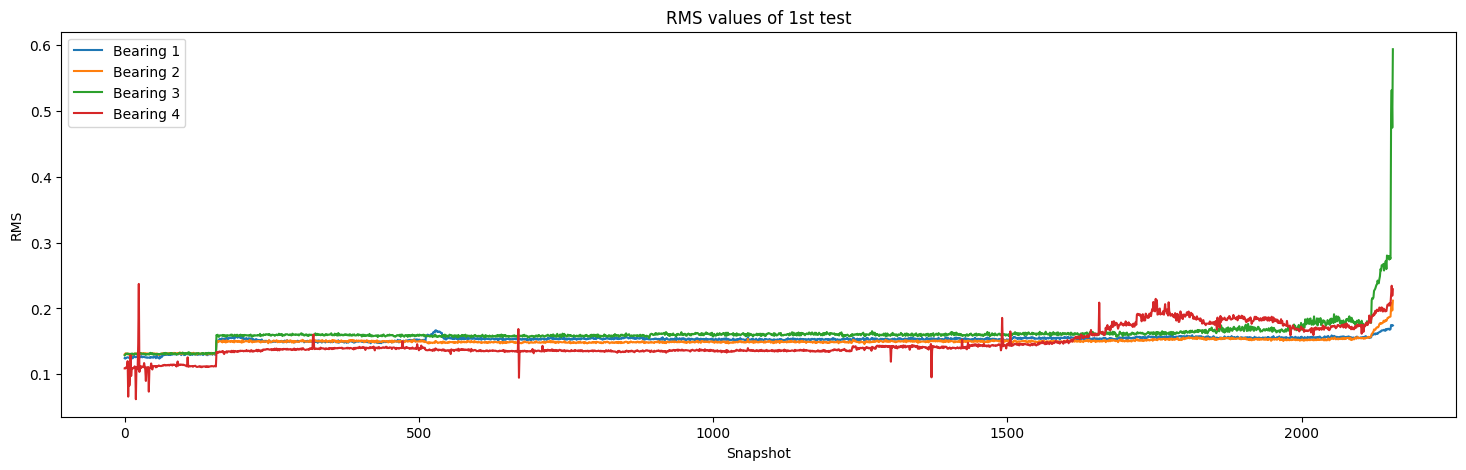

In [11]:
# Calculate the RMS of each snapshot
def calculate_RMS(np_array):
    rms_list = []
    for snapshot in np_array:
        rms_list.append(np.sqrt(np.mean(snapshot ** 2)))
    return np.array(rms_list)

bearing1_1_rms = calculate_RMS(bearing1_1)
bearing1_2_rms = calculate_RMS(bearing1_2)
bearing1_3_rms = calculate_RMS(bearing1_3)
bearing1_4_rms = calculate_RMS(bearing1_4)

# Plot the RMS values
plt.figure(figsize=(18,5))
plt.title(f'RMS values of 1st test')

plt.xlabel("Snapshot")
plt.ylabel("RMS")

plt.plot(bearing1_1_rms, label='Bearing 1')
plt.plot(bearing1_2_rms, label='Bearing 2')
plt.plot(bearing1_3_rms, label='Bearing 3')
plt.plot(bearing1_4_rms, label='Bearing 4')

plt.legend() 
plt.show()

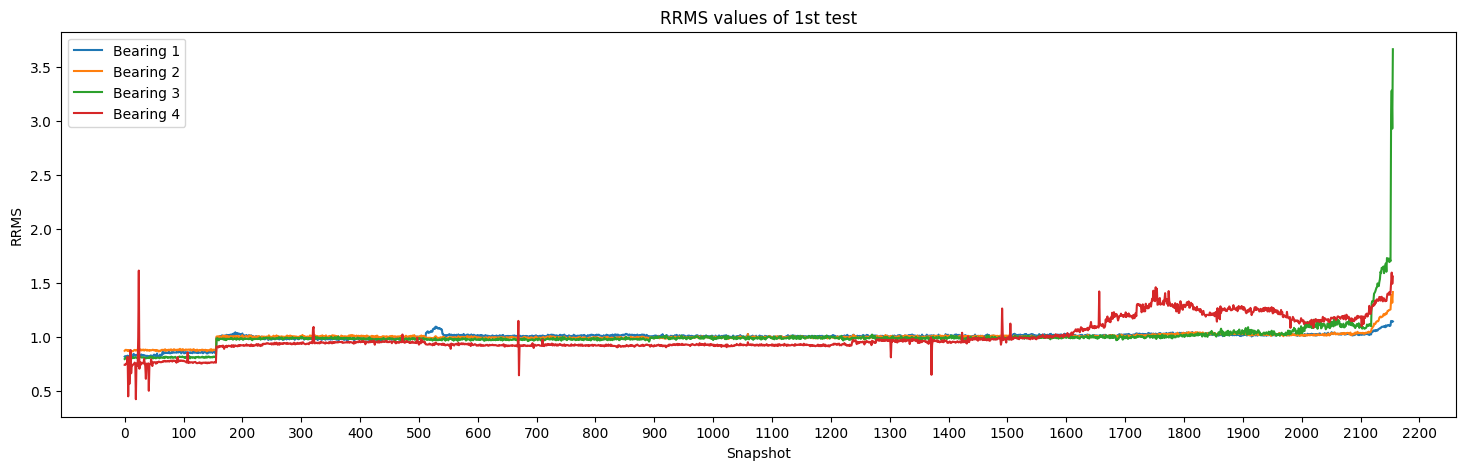

In [12]:
# RMS is not dimensionless and typical RMS value can differ from bearing to bearing
# To remove the dependancy on particular units and working condition from affecting, relative RMS is used

bearing1_1_rrms = bearing1_1_rms / bearing1_1_rms.mean()
bearing1_2_rrms = bearing1_2_rms / bearing1_2_rms.mean()
bearing1_3_rrms = bearing1_3_rms / bearing1_3_rms.mean()
bearing1_4_rrms = bearing1_4_rms / bearing1_4_rms.mean()

# Plot the RRMS values
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of 1st test')

plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing1_1_rrms, label='Bearing 1')
plt.plot(bearing1_2_rrms, label='Bearing 2')
plt.plot(bearing1_3_rrms, label='Bearing 3')
plt.plot(bearing1_4_rrms, label='Bearing 4')

plt.xticks(np.arange(0, 2201, 100))

plt.legend() 
plt.show()

# Identifying the three phase of the bearings
As pointed out by [1], "bearing life can be divided into three different periods, namely, the run-in period, useful life period, and wear-out period". From the RRMS plot we can identify the end of the run-in period for all four bearings is roughly around the 160th snapshot mark. The beginning of the wear-in period however, does not have the same agreement. First and foremost each bearing has a different period when wear-out started. Bearings 1 & 2 was noted by [2] to not have any defects at the end of the test but the RRMS plot suggests bearings 1 & 2 experienced wear-out shortly before the experiment concluded. Bearing 3 experienced wear-out earlier at around 2000th snapshot and bearing 4 was the first to experience wear-out at around the 1600th snapshot. Moreover, while bearings 3 & 4 was noted to have defects by the end of the experiment, it is clear that bearing 3 experienced a more severe defect than bearing 4. This complicates RUL prediction as we can only calculate how much time a snapshot has before the experiment concludes. This means at around the 2150th snapshot we regard bearings 3 & 4 to have 0 RUL remaining despite bearing 4 realistically can be used slightly longer before it reaches the state of bearing 3. 

To rectify this, we follow the work of [3], where wear-in period begins when its RRMS value exceed a threshold (1.1 seems to work here) and the complete failure is defined when its RRMS value exceed another higher threshold (3.5 seems to work here). If a bearing ended the experiment before reaching the complete failure threshold (such as bearing1_4) then we can't use it for RUL prediction as the bearing hasn't "completely fail".


References:
---
* [1] Jin, Xiaohang, et al. "Anomaly detection and fault prognosis for bearings." IEEE Transactions on Instrumentation and Measurement 65.9 (2016): 2046-2054.
* [2] Qiu, Hai, et al. "Wavelet filter-based weak signature detection method and its application on rolling element bearing prognostics." Journal of sound and vibration 289.4-5 (2006): 1066-1090.
* [3] Yan, Mingming, et al. "Bearing remaining useful life prediction using support vector machine and hybrid degradation tracking model." ISA transactions 98 (2020): 471-482.

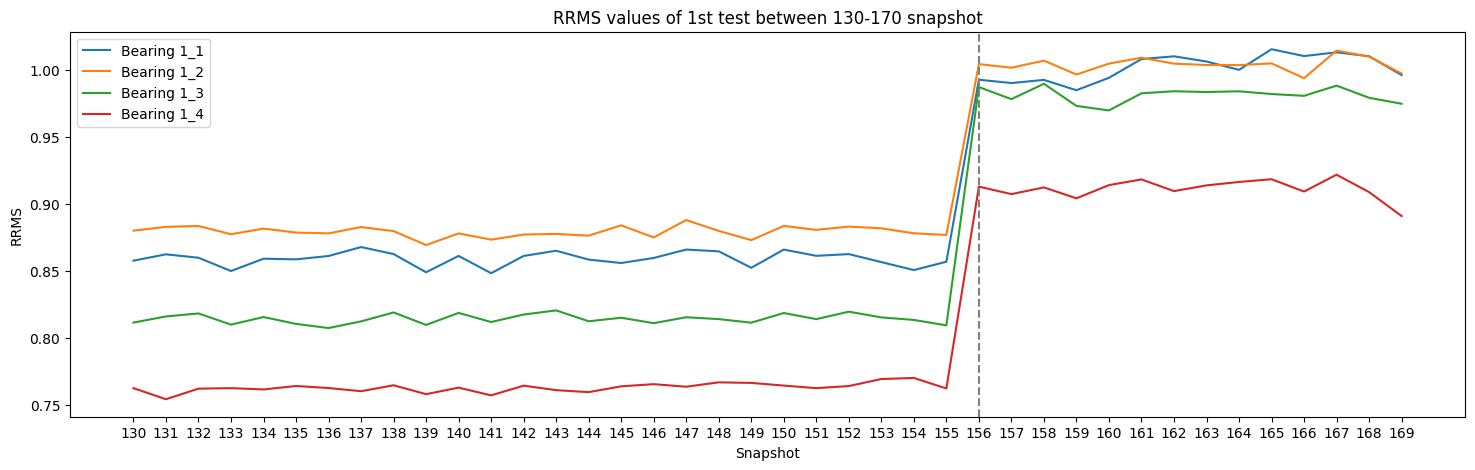

In [13]:
# Identifying when Run-in period ended
# Plot the RRMS values between 130 and 170 snapshot
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of 1st test between 130-170 snapshot')

plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(np.arange(130,170), bearing1_1_rrms[130:170], label='Bearing 1_1')
plt.plot(np.arange(130,170), bearing1_2_rrms[130:170], label='Bearing 1_2')
plt.plot(np.arange(130,170), bearing1_3_rrms[130:170], label='Bearing 1_3')
plt.plot(np.arange(130,170), bearing1_4_rrms[130:170], label='Bearing 1_4')

plt.axvline(x=156, linestyle='dashed', color='grey')

plt.xticks(np.arange(130, 170, 1))

plt.legend() 
plt.show()

In [14]:
# Identifying end of run-in period for experiment 2
def read_2nd_test():
    # Read all snapshot in the folder & split them into bearing 1, 2, 3, 4
    snap_shot_list = os.listdir(os.path.join(IMS_class.download_path, '2nd_test'))
    bearing1_list, bearing2_list, bearing3_list, bearing4_list = [], [], [], []
    for i, snap_shot in enumerate(snap_shot_list):
        bearing1_snapshot, bearing2_snapshot, bearing3_snapshot, bearing4_snapshot = read_file_2nd(snap_shot)
        bearing1_list.append(bearing1_snapshot)
        bearing2_list.append(bearing2_snapshot)
        bearing3_list.append(bearing3_snapshot)
        bearing4_list.append(bearing4_snapshot)
        
    # Convert the list into a np array
    bearing1_1 = np.vstack(bearing1_list)
    bearing1_2 = np.vstack(bearing2_list)
    bearing1_3 = np.vstack(bearing3_list)
    bearing1_4 = np.vstack(bearing4_list)
    
    return bearing1_1, bearing1_2, bearing1_3, bearing1_4

def read_file_2nd(file_name):
    file_path = os.path.join(IMS_class.download_path, '2nd_test', file_name)
    signal_df = pd.read_csv(file_path, sep='\t', header=None)
    # Return signal of bearing1, bearing2, bearing3, bearing4
    return np.array(signal_df[0]), np.array(signal_df[1]), np.array(signal_df[2]), np.array(signal_df[3])

bearing2_1, bearing2_2, bearing2_3, bearing2_4 = read_2nd_test()
bearing2_1_rms, bearing2_2_rms, bearing2_3_rms, bearing2_4_rms = calculate_RMS(bearing2_1), calculate_RMS(bearing2_2), calculate_RMS(bearing2_3), calculate_RMS(bearing2_4)
bearing2_1_rrms, bearing2_2_rrms, bearing2_3_rrms, bearing2_4_rrms = bearing2_1_rms/bearing2_1_rms.mean(), bearing2_2_rms/bearing2_2_rms.mean(), bearing2_3_rms/bearing2_3_rms.mean(), bearing2_4_rms/bearing2_4_rms.mean()

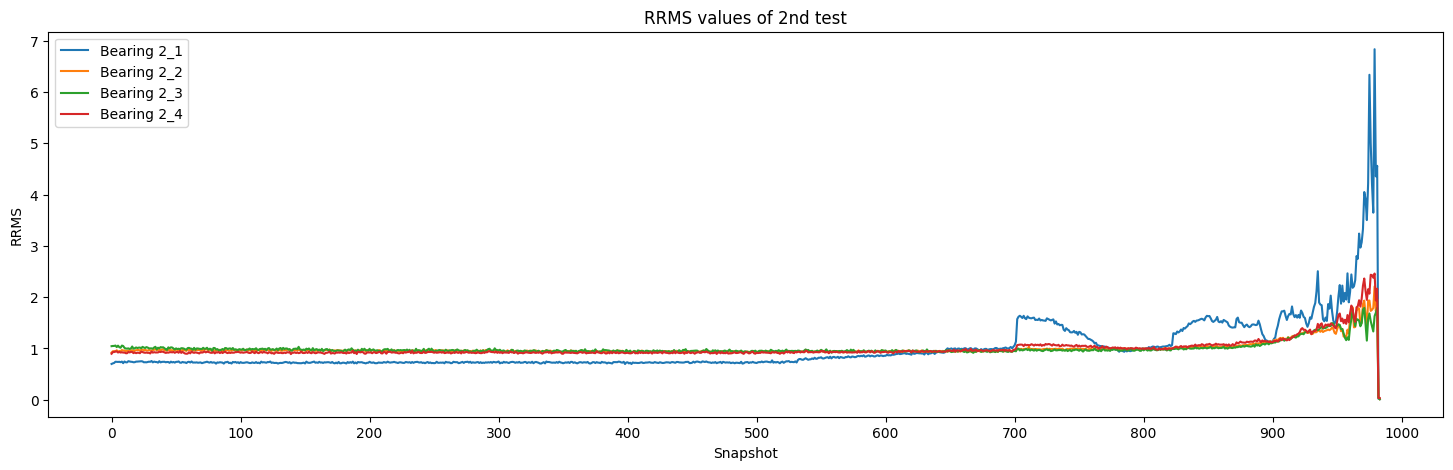

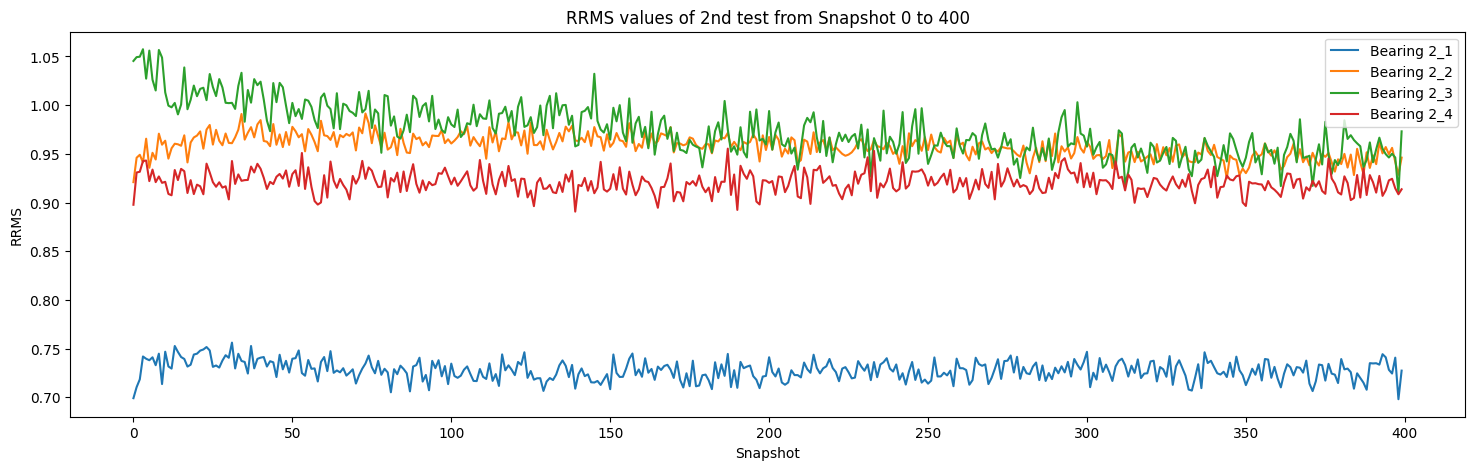

In [15]:
# Plot the RRMS values for 2nd test. No run-in period is detected so the start of the experiment can be treated as healthy signal
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of 2nd test')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing2_1_rrms, label='Bearing 2_1')
plt.plot(bearing2_2_rrms, label='Bearing 2_2')
plt.plot(bearing2_3_rrms, label='Bearing 2_3')
plt.plot(bearing2_4_rrms, label='Bearing 2_4')

plt.xticks(np.arange(0, 1001, 100))

plt.legend() 
plt.show()

plt.figure(figsize=(18,5))
plt.title(f'RRMS values of 2nd test from Snapshot 0 to 400')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing2_1_rrms[0:400], label='Bearing 2_1')
plt.plot(bearing2_2_rrms[0:400], label='Bearing 2_2')
plt.plot(bearing2_3_rrms[0:400], label='Bearing 2_3')
plt.plot(bearing2_4_rrms[0:400], label='Bearing 2_4')

plt.legend() 
plt.show()

In [16]:
# Identifying end of run-in period for experiment 3
def read_3rd_test():
    # Read all snapshot in the folder & split them into bearing 1, 2, 3, 4
    snap_shot_list = os.listdir(os.path.join(IMS_class.download_path, '4th_test', 'txt'))
    bearing1_list, bearing2_list, bearing3_list, bearing4_list = [], [], [], []
    for i, snap_shot in enumerate(snap_shot_list):
        bearing1_snapshot, bearing2_snapshot, bearing3_snapshot, bearing4_snapshot = read_file_3rd(snap_shot)
        bearing1_list.append(bearing1_snapshot)
        bearing2_list.append(bearing2_snapshot)
        bearing3_list.append(bearing3_snapshot)
        bearing4_list.append(bearing4_snapshot)
        
    # Convert the list into a np array
    bearing1_1 = np.vstack(bearing1_list)
    bearing1_2 = np.vstack(bearing2_list)
    bearing1_3 = np.vstack(bearing3_list)
    bearing1_4 = np.vstack(bearing4_list)
    
    return bearing1_1, bearing1_2, bearing1_3, bearing1_4

def read_file_3rd(file_name):
    file_path = os.path.join(IMS_class.download_path, '4th_test', 'txt', file_name)
    signal_df = pd.read_csv(file_path, sep='\t', header=None)
    # Return signal of bearing1, bearing2, bearing3, bearing4
    return np.array(signal_df[0]), np.array(signal_df[1]), np.array(signal_df[2]), np.array(signal_df[3])
    
bearing3_1, bearing3_2, bearing3_3, bearing3_4 = read_3rd_test()
bearing3_1_rms, bearing3_2_rms, bearing3_3_rms, bearing3_4_rms = calculate_RMS(bearing3_1), calculate_RMS(bearing3_2), calculate_RMS(bearing3_3), calculate_RMS(bearing3_4)
bearing3_1_rrms, bearing3_2_rrms, bearing3_3_rrms, bearing3_4_rrms = bearing3_1_rms/bearing3_1_rms.mean(), bearing3_2_rms/bearing3_2_rms.mean(), bearing3_3_rms/bearing3_3_rms.mean(), bearing3_4_rms/bearing3_4_rms.mean()

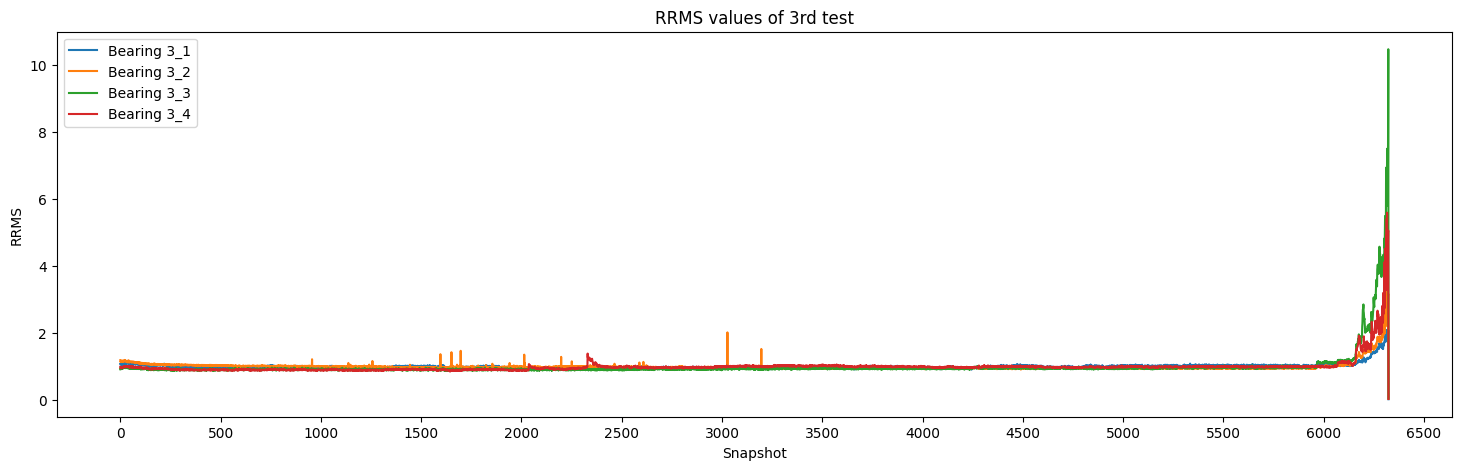

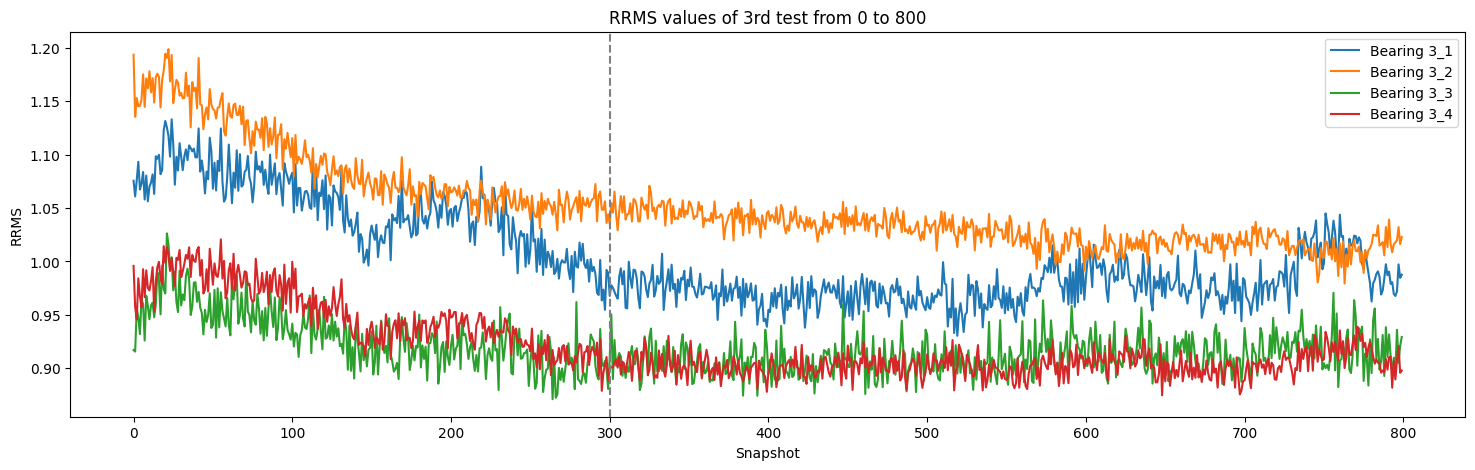

In [17]:
# Plot the RRMS values for 3rd test. No run-in period is detected so the start of the experiment can be treated as healthy signal
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of 3rd test')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing3_1_rrms, label='Bearing 3_1')
plt.plot(bearing3_2_rrms, label='Bearing 3_2')
plt.plot(bearing3_3_rrms, label='Bearing 3_3')
plt.plot(bearing3_4_rrms, label='Bearing 3_4')

plt.xticks(np.arange(0, 6501, 500))

plt.legend() 
plt.show()

plt.figure(figsize=(18,5))
plt.title(f'RRMS values of 3rd test from 0 to 800')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing3_1_rrms[0:800], label='Bearing 3_1')
plt.plot(bearing3_2_rrms[0:800], label='Bearing 3_2')
plt.plot(bearing3_3_rrms[0:800], label='Bearing 3_3')
plt.plot(bearing3_4_rrms[0:800], label='Bearing 3_4')

plt.axvline(x=300, linestyle='dashed', color='grey')

plt.legend() 
plt.show()

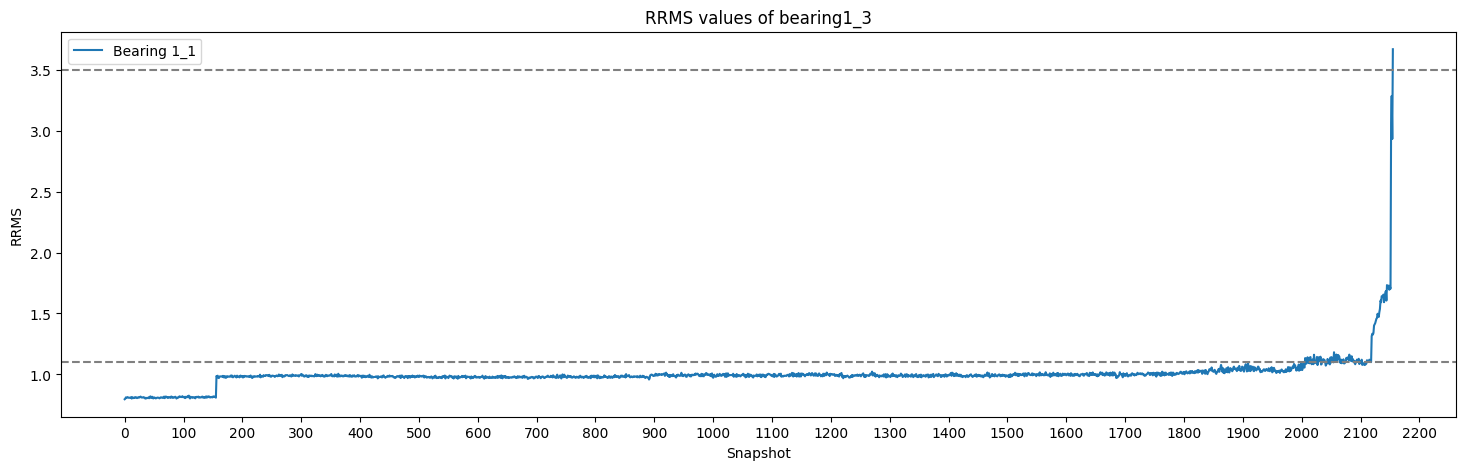

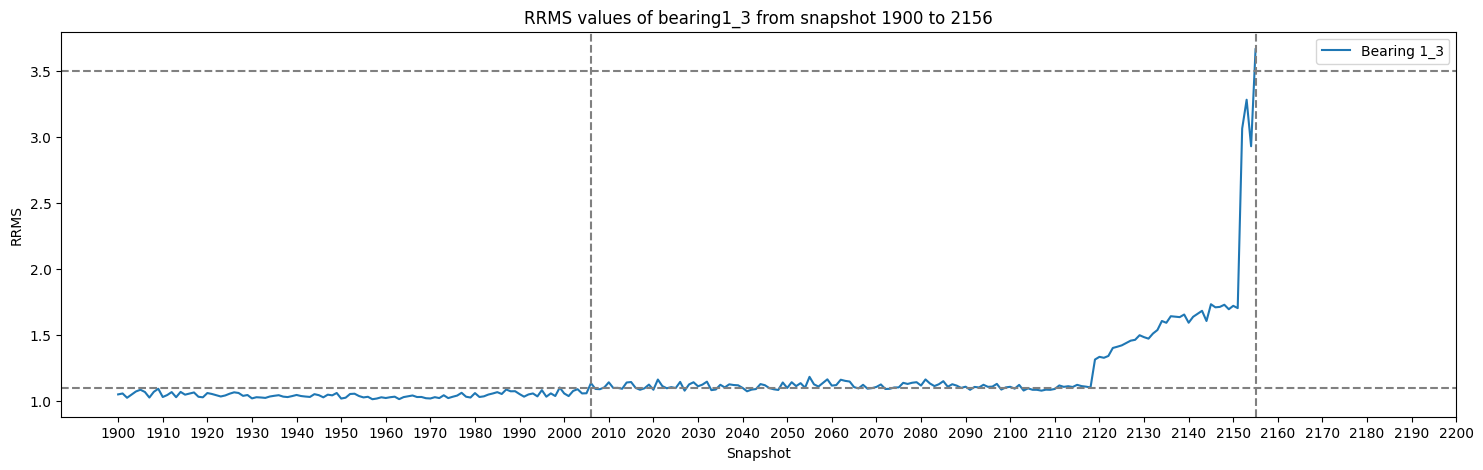

In [18]:
# Identifying when wear-out period begins for bearing1_3 (snapshots 2006 to 2155 = 149 snapshots used in RUL)
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of bearing1_3')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing1_3_rrms, label='Bearing 1_1')
plt.axhline(y=1.1, linestyle='dashed', color='grey')
plt.axhline(y=3.5, linestyle='dashed', color='grey')

plt.xticks(np.arange(0, 2201, 100))

plt.legend() 
plt.show()

# Zoomed in graph
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of bearing1_3 from snapshot 1900 to 2156')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(np.arange(1900,2156), bearing1_3_rrms[1900:2156], label='Bearing 1_3')
plt.axhline(y=1.1, linestyle='dashed', color='grey')
plt.axhline(y=3.5, linestyle='dashed', color='grey')

plt.axvline(x=2006, linestyle='dashed', color='grey')
plt.axvline(x=2155, linestyle='dashed', color='grey')

plt.xticks(np.arange(1900, 2201, 10))

plt.legend() 
plt.show()

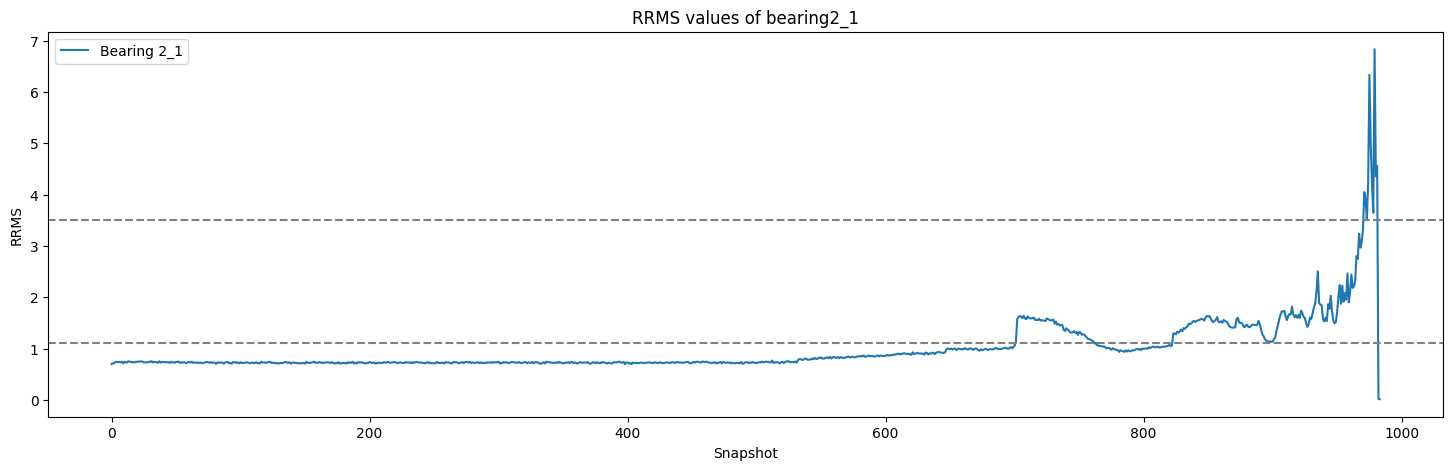

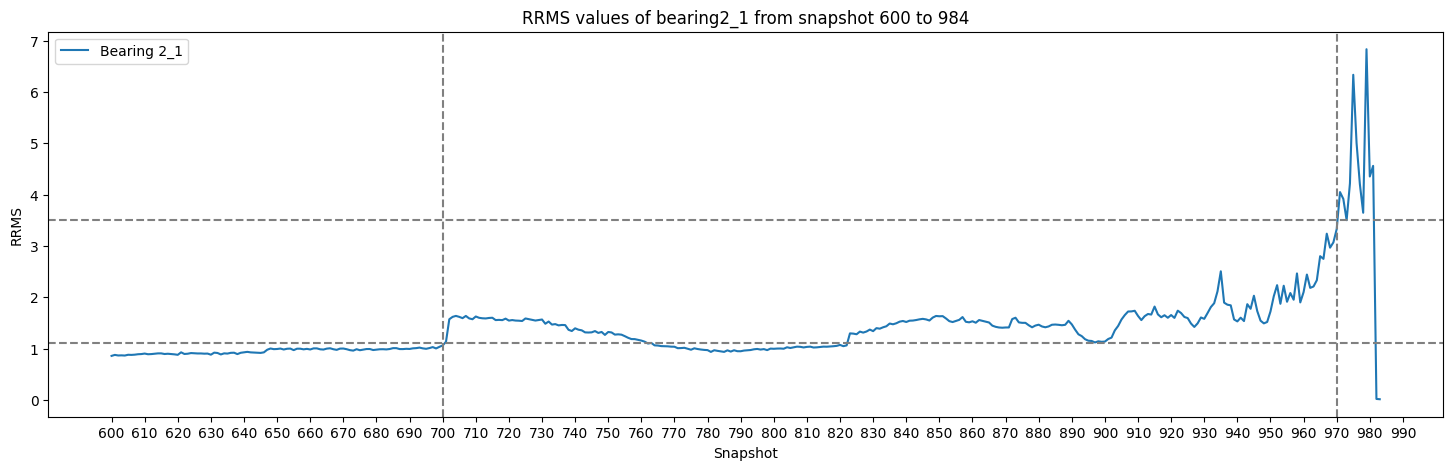

In [19]:
# Identifying when wear-out period begins for bearing2_1 (snapshots 700 to 970 = 270 snapshots used in RUL)
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of bearing2_1')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing2_1_rrms, label='Bearing 2_1')
plt.axhline(y=1.1, linestyle='dashed', color='grey')
plt.axhline(y=3.5, linestyle='dashed', color='grey')

plt.legend() 
plt.show()

# Zoomed in graph
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of bearing2_1 from snapshot 600 to 984')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(np.arange(600,984), bearing2_1_rrms[600:984], label='Bearing 2_1')
plt.axhline(y=1.1, linestyle='dashed', color='grey')
plt.axhline(y=3.5, linestyle='dashed', color='grey')

plt.axvline(x=700, linestyle='dashed', color='grey')
plt.axvline(x=970, linestyle='dashed', color='grey')

plt.xticks(np.arange(600, 1000, 10))

plt.legend() 
plt.show()

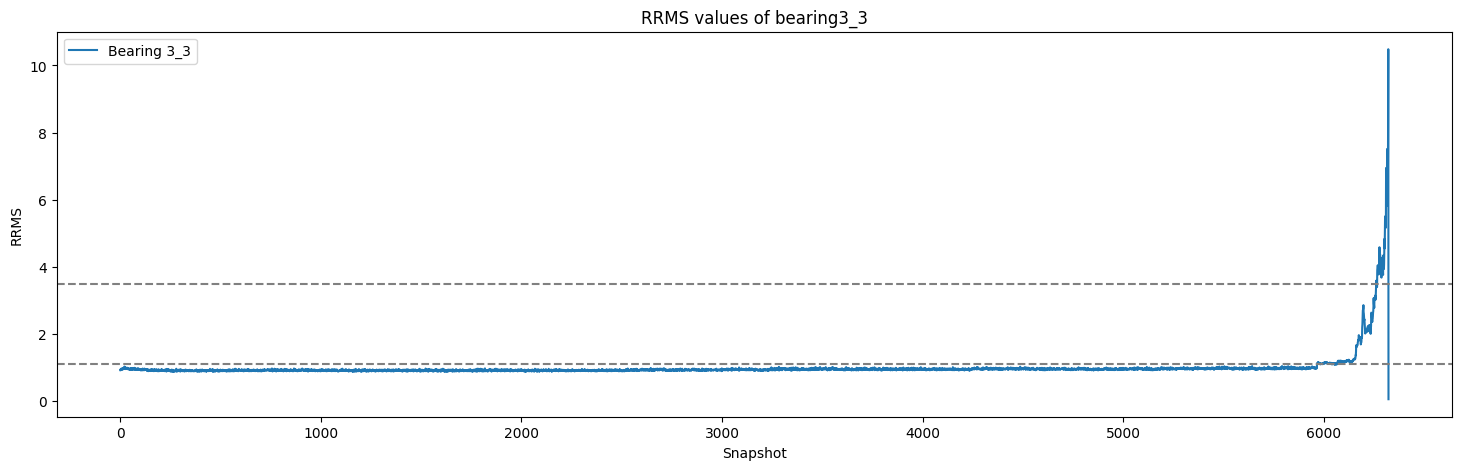

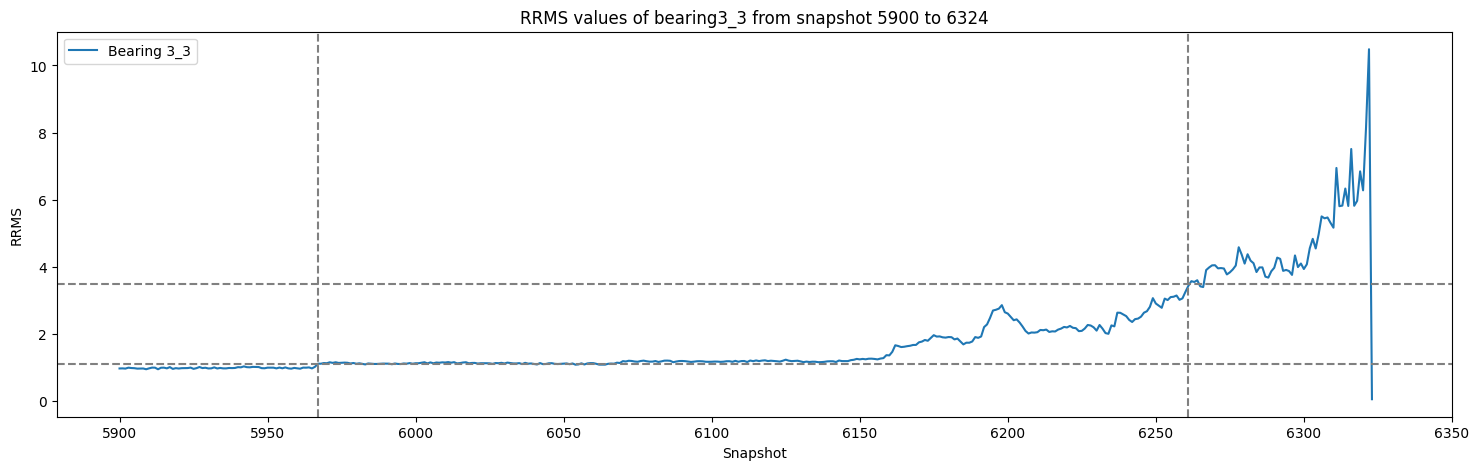

In [20]:
# Identifying when wear-out period begins for bearing3_3 (snapshots 5967 to 6261 = 294 snapshots used in RUL)
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of bearing3_3')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(bearing3_3_rrms, label='Bearing 3_3')
plt.axhline(y=1.1, linestyle='dashed', color='grey')
plt.axhline(y=3.5, linestyle='dashed', color='grey')

plt.legend() 
plt.show()

# Zoomed in graph
plt.figure(figsize=(18,5))
plt.title(f'RRMS values of bearing3_3 from snapshot 5900 to 6324')
plt.xlabel("Snapshot")
plt.ylabel("RRMS")

plt.plot(np.arange(5900,6324), bearing3_3_rrms[5900:6324], label='Bearing 3_3')
plt.axhline(y=1.1, linestyle='dashed', color='grey')
plt.axhline(y=3.5, linestyle='dashed', color='grey')

plt.axvline(x=5967, linestyle='dashed', color='grey')
plt.axvline(x=6261, linestyle='dashed', color='grey')

plt.xticks(np.arange(5900, 6400, 50))

plt.legend() 
plt.show()

# Data processing for RUL

In [21]:
_, _, bearing1_3, _ = read_1st_test()
bearing2_1, _, _, _ = read_2nd_test()
_, _, bearing3_3, _ = read_3rd_test()

# Bearing 1_3 has the least data so we will use it as training data
bearing1_3_x = torch.tensor(bearing1_3[2006:2155]) # Training
bearing2_1_x = torch.tensor(bearing2_1[700:970]) # Validation
bearing3_3_x = torch.tensor(bearing3_3[5967:6261]) # Testing

bearing1_3_y = torch.tensor(np.arange(len(bearing1_3_x)-1, -1, -1))
bearing2_1_y = torch.tensor(np.arange(len(bearing2_1_x)-1, -1, -1))
bearing3_3_y = torch.tensor(np.arange(len(bearing3_3_x)-1, -1, -1))

print(f'Bearing1_3 x: {bearing1_3_x.shape}, y: {bearing1_3_y.shape}')
print(f'Bearing2_1 x: {bearing2_1_x.shape}, y: {bearing2_1_y.shape}')
print(f'Bearing3_3 x: {bearing3_3_x.shape}, y: {bearing3_3_y.shape}')

Bearing1_3 x: torch.Size([149, 20480]), y: torch.Size([149])
Bearing2_1 x: torch.Size([270, 20480]), y: torch.Size([270])
Bearing3_3 x: torch.Size([294, 20480]), y: torch.Size([294])


In [22]:
# Normalising x and y values
bearing1_3_x = (bearing1_3_x-torch.mean(bearing1_3_x))/torch.std(bearing1_3_x)
bearing2_1_x = (bearing2_1_x-torch.mean(bearing2_1_x))/torch.std(bearing2_1_x)
bearing3_3_x = (bearing3_3_x-torch.mean(bearing3_3_x))/torch.std(bearing3_3_x)

bearing1_3_y = bearing1_3_y / (len(bearing1_3_y)-1)
bearing2_1_y = bearing2_1_y / (len(bearing2_1_y)-1)
bearing3_3_y = bearing3_3_y / (len(bearing3_3_y)-1)

print(f"Bearing1_3 x:{bearing1_3_x}, y:{bearing1_3_y}")

Bearing1_3 x:tensor([[-1.3968e+00,  7.9323e-01,  5.9882e-01,  ..., -1.1452e+00,
         -9.5075e-01,  1.8568e+00],
        [ 1.5194e+00, -1.9598e-01, -7.0182e-02,  ...,  9.9336e-01,
         -2.6459e-01,  9.1903e-01],
        [ 2.1000e-01,  2.5003e-01,  7.7036e-01,  ...,  3.0721e-01,
          1.1878e+00,  5.9882e-01],
        ...,
        [ 1.5588e-02, -2.2602e+00,  8.6757e-01,  ...,  1.1279e-01,
         -1.5661e-03, -1.0194e+00],
        [-2.7348e+00,  2.7488e+00, -1.5912e+00,  ..., -3.3321e-01,
         -1.6312e+00,  3.5436e+00],
        [ 1.2678e+00,  1.7596e+00, -3.5036e-01,  ..., -2.9318e-01,
         -1.7170e+00,  9.1903e-01]], dtype=torch.float64), y:tensor([1.0000, 0.9932, 0.9865, 0.9797, 0.9730, 0.9662, 0.9595, 0.9527, 0.9459,
        0.9392, 0.9324, 0.9257, 0.9189, 0.9122, 0.9054, 0.8986, 0.8919, 0.8851,
        0.8784, 0.8716, 0.8649, 0.8581, 0.8514, 0.8446, 0.8378, 0.8311, 0.8243,
        0.8176, 0.8108, 0.8041, 0.7973, 0.7905, 0.7838, 0.7770, 0.7703, 0.7635,
        0.7

In [23]:
# Subsample to increase data quantity
def sliding_window_subsample(tensor_x, tensor_y, window_size=1024, stride=0.2):
    step = int(window_size * stride)
    tensor_x = tensor_x.unsqueeze(1).unfold(2, window_size, step)
    B, C, W, L = tensor_x.size() # Get the tensor dimensions for reshaping
    tensor_x = tensor_x.reshape(B*W, C, L)
    tensor_y.unsqueeze(1).repeat(1, W).reshape(B*W)
    return tensor_x, tensor_y

bearing1_3_x, bearing1_3_y = sliding_window_subsample(bearing1_3_x, bearing1_3_y)
bearing2_1_x, bearing2_1_y = sliding_window_subsample(bearing2_1_x, bearing2_1_y)
bearing3_3_x, bearing1_3_y = sliding_window_subsample(bearing3_3_x, bearing3_3_y)

print(f'Bearing1_3 x: {bearing1_3_x.shape}, y: {bearing1_3_y.shape}')
print(f'Bearing2_1 x: {bearing2_1_x.shape}, y: {bearing2_1_y.shape}')
print(f'Bearing3_3 x: {bearing3_3_x.shape}, y: {bearing3_3_y.shape}')

Bearing1_3 x: torch.Size([14304, 1, 1024]), y: torch.Size([294])
Bearing2_1 x: torch.Size([25920, 1, 1024]), y: torch.Size([270])
Bearing3_3 x: torch.Size([28224, 1, 1024]), y: torch.Size([294])


In [24]:
# Get save directory
if not os.path.exists(IMS_class.processed_path):
    os.makedirs(IMS_class.processed_path)

train = {"samples": bearing1_3_x, "labels": bearing1_3_y}
val = {"samples": bearing2_1_x, "labels": bearing2_1_y}
test = {"samples": bearing3_3_x, "labels": bearing3_3_y}


torch.save(train, os.path.join(IMS_class.processed_path, "train.pt"))
torch.save(val, os.path.join(IMS_class.processed_path, "val.pt"))
torch.save(test, os.path.join(IMS_class.processed_path, "test.pt"))